In [2]:
%matplotlib inline
import pandas as pd

In [3]:
compras_df = pd.read_csv('../data/clean_compras.csv')

In [4]:
data = compras_df.copy()

In [5]:
data.dtypes

PROV              int64
BENEFICIARIO     object
RFC              object
NUM FACT         object
CONTRATO         object
DESCRIPCION      object
TIPO OP          object
BCO-OP          float64
FECH EMI         object
IMPORTE         float64
SHEET            object
dtype: object

## Llenar los valores faltantes del dataframe

In [7]:
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    #si el tipo de dato es object
    if column == "object":
        data[data.columns[i]]= data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]]= data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]]= data[data.columns[i]].fillna(data[data.columns[i]].median())

In [8]:
data.dtypes

PROV              int64
BENEFICIARIO      int16
RFC               int16
NUM FACT          int16
CONTRATO          int16
DESCRIPCION       int16
TIPO OP            int8
BCO-OP          float64
FECH EMI          int16
IMPORTE         float64
SHEET              int8
dtype: object

In [9]:
data.head(5)

,PROV,BENEFICIARIO,RFC,NUM FACT,CONTRATO,DESCRIPCION,TIPO OP,BCO-OP,FECH EMI,IMPORTE,SHEET
0,123629,1665,1623,14775,4788,3208,1,225000024.0,9,7859725.14,1
1,123629,1665,1623,14776,4788,3206,1,225000024.0,9,3152852.45,1
2,123629,1665,1623,14777,4788,3207,1,225000024.0,9,8763325.29,1
3,123629,1665,1623,14778,4788,3168,1,229000030.0,9,1842839.12,1
4,123629,1665,1623,14779,4788,3147,1,239000001.0,9,2281374.75,1


### Utilizar random forest (MODELO SUPERVISADO)

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = data.pop('IMPORTE')

In [14]:
X = data

In [15]:
X

,PROV,BENEFICIARIO,RFC,NUM FACT,CONTRATO,DESCRIPCION,TIPO OP,BCO-OP,FECH EMI,SHEET
0,123629,1665,1623,14775,4788,3208,1,225000024.0,9,1
1,123629,1665,1623,14776,4788,3206,1,225000024.0,9,1
2,123629,1665,1623,14777,4788,3207,1,225000024.0,9,1
3,123629,1665,1623,14778,4788,3168,1,229000030.0,9,1
4,123629,1665,1623,14779,4788,3147,1,239000001.0,9,1
...,...,...,...,...,...,...,...,...,...,...
17637,203016,2341,544,11441,303,8487,0,1097438.0,234,3
17638,203016,2341,544,11445,303,8487,0,1097440.0,234,3
17639,203016,2392,2331,4291,303,10171,0,245000001.0,237,3
17640,203016,2413,2345,8231,303,8242,0,1097471.0,236,3


## Dividir los datos en dos grupos

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
clf = RandomForestRegressor(n_estimators=1000, max_depth = 4)

In [19]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test, clf.predict(X_test))

0.20329915104808838

## MODELO NO SUPERVISADO O DE CLUSTERING

In [23]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [24]:
compras_df_c = compras_df.copy()

In [25]:
compras_df_c.head()

,PROV,BENEFICIARIO,RFC,NUM FACT,CONTRATO,DESCRIPCION,TIPO OP,BCO-OP,FECH EMI,IMPORTE,SHEET
0,123629,"PAVIMENTACIONES, CAMINOS Y COMPACTACIONES, S.A...",PCC890216TG1,B4668,SOP/697/2016,EJE RP-2016 (GONZALITOS) EST. 18E OP-R23-01/16...,TR,225000024.0,2017-01-09 00:00:00,7859725.14,CONTRATISTAS
1,123629,"PAVIMENTACIONES, CAMINOS Y COMPACTACIONES, S.A...",PCC890216TG1,B4669,SOP/697/2016,"EJE RP-2016 (AV. ALMAZAN, AV. AARON SAENZ Y AV...",TR,225000024.0,2017-01-09 00:00:00,3152852.45,CONTRATISTAS
2,123629,"PAVIMENTACIONES, CAMINOS Y COMPACTACIONES, S.A...",PCC890216TG1,B4725,SOP/697/2016,"EJE RP-2016 (AV. ALMAZAN, AV. AARON SAENZ Y AV...",TR,225000024.0,2017-01-09 00:00:00,8763325.29,CONTRATISTAS
3,123629,"PAVIMENTACIONES, CAMINOS Y COMPACTACIONES, S.A...",PCC890216TG1,B4734,SOP/697/2016,EJE RE-FDO-DES-MCIPAL-2016 (AV. FIDEL VELAZQUE...,TR,229000030.0,2017-01-09 00:00:00,1842839.12,CONTRATISTAS
4,123629,"PAVIMENTACIONES, CAMINOS Y COMPACTACIONES, S.A...",PCC890216TG1,B4735,SOP/697/2016,EJE R23-2016 (PROG-REG) EST. 21E OP-R23-01/16-...,TR,239000001.0,2017-01-09 00:00:00,2281374.75,CONTRATISTAS


In [26]:
compras_df_c_grupo = compras_df_c.groupby("BENEFICIARIO").agg({'CONTRATO': lambda x: x.nunique(), 'IMPORTE': 'sum',
                                                              'NUM FACT': lambda x: x.nunique()})

In [27]:
compras_df_cluster = compras_df_c_grupo.reset_index()

In [28]:
compras_df_cluster

,BENEFICIARIO,CONTRATO,IMPORTE,NUM FACT
0,"(F INTERAC) EOLICA SANTA CATARINA, S DE RL DE CV",1,10389165.28,3
1,(F INTERACC) CHRISTUS MUGUERZA SISTEMAS HOSPIT...,2,19375726.73,644
2,"(F INTERACC) EOLICA SANTA CATARINA, S. DE R.L....",1,10704726.94,3
3,"3G CONSULTING Y ASESORIA, S.A. DE C.V.",8,2950822.44,8
4,"ABA SEGUROS,S.A DE C.V.",2,19013345.90,41
...,...,...,...,...
2454,ZAYAS CAMACHO MARTIN,1,9048.71,1
2455,ZERTUCHE HERNANDEZ FRANCISCO JAVIER,1,10318.64,2
2456,ZOZAYA HERNANDEZ MONICA LUCIA,1,76891.46,13
2457,"ZULU INFRAESTRUCTURA, S.A. DE C.V.",2,4999874.33,4


In [29]:
compras_df_c_grupo_f = compras_df_c_grupo.reset_index().drop(['BENEFICIARIO'], axis = 1)

In [30]:
normalizado_compras_df = (compras_df_c_grupo_f - compras_df_c_grupo_f.min())/(compras_df_c_grupo_f.max() - compras_df_c_grupo_f.min())

In [31]:
normalizado_compras_df.head(5)

,CONTRATO,IMPORTE,NUM FACT
0,0.000000,0.020468,0.002561
1,0.001497,0.038172,0.823303
2,0.000000,0.021089,0.002561
3,0.010479,0.005813,0.008963
4,0.001497,0.037458,0.051216


In [32]:
wcss=[]

In [33]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter= 300)
    kmeans.fit(normalizado_compras_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


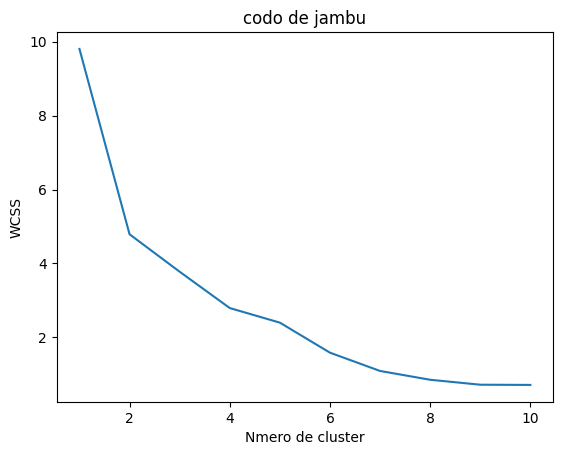

In [34]:
plt.plot(range(1,11),wcss)
plt.title('codo de jambu')
plt.xlabel('Nmero de cluster')
plt.ylabel('WCSS') #Indica la cantidad de similitud de los individuos
plt.show()

In [66]:
clustering = KMeans(n_clusters = 3, max_iter=300)

In [68]:
clustering.fit(normalizado_compras_df)

KMeans(n_clusters=3)

In [70]:
compras_df_cluster['KMeans_Cluster'] = clustering.labels_

In [72]:
compras_df_cluster['KMeans_Cluster'].value_counts()

KMeans_Cluster
0    2438
1      17
2       4
Name: count, dtype: int64

In [76]:
from sklearn.decomposition import PCA

In [78]:
pca= PCA(n_components=2)

In [80]:
pca_compras = pca.fit_transform(normalizado_compras_df)

In [82]:
pca_compras_df = pd.DataFrame(data = pca_compras, columns = ['componente_1','componente_2'])

In [84]:
pca_nombres_beneficia = pd.concat([pca_compras_df, compras_df_cluster['KMeans_Cluster']], axis = 1)

In [90]:
pca_nombres_beneficia

,componente_1,componente_2,KMeans_Cluster
0,-0.003073,0.017506,0
1,0.738666,-0.035342,1
2,-0.002968,0.018111,0
3,0.004441,0.000438,0
4,0.044154,0.029570,0
...,...,...,...
2454,-0.008823,-0.002163,0
2455,-0.007672,-0.002270,0
2456,0.005018,-0.003339,0
2457,-0.003107,0.006747,0


In [92]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

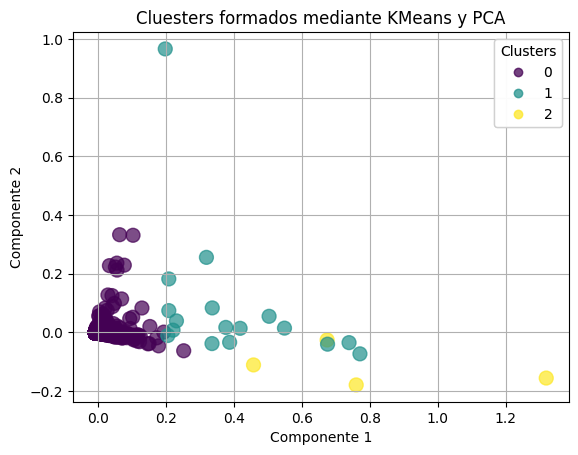

In [98]:
scatter = plt.scatter(pca_nombres_beneficia['componente_1'],
                      pca_nombres_beneficia['componente_2'],
                      c=pca_nombres_beneficia['KMeans_Cluster'],
                      cmap='viridis',
                      s=100,
                      alpha=0.7)

# Añadir el título y etiquetas
plt.title('Cluesters formados mediante KMeans y PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
legend1 = plt.legend(*scatter.legend_elements(), title='Clusters')
plt.gca().add_artist(legend1)
plt.grid()
plt.show()